Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [76]:
#imports
import pandas as pd 
import matplotlib.pyplot as plt 

In [77]:
#import wanted data frames and define them 
dfpart1 = pd.read_csv('foursquare_restaurantDF.csv')
dfpart2 = pd.read_csv('yelpdf.csv')
dfpart3 = pd.read_csv('hamilton_citybikes')

In [78]:
#use an outer join to merge the 3 dataframes (fsq, yelp and citybikes)
yelpandfsq_mergedDF = pd.merge(dfpart1, dfpart2, on= 'name', how = 'outer' )


In [79]:
YelpFsqCitybikesDF = pd.merge(yelpandfsq_mergedDF, dfpart3, on='name', how='outer')
#this data frame contains lots of NaN from incomplete data gathering from Fsq,this would ruin my visulization results 
#so i have to clean before trying to visualize 

pd.set_option('display.max_rows', None)

In [90]:
# the issue with this data frame is that ratings is not present in all restaurants and there are retaurant dupes from fsq and yelp
#to clean data first concatenate ratings from yelp into fsq columns under the assumption they have the same restaurant data
concat_yelp_fsq = pd.concat([dfpart1, dfpart2], ignore_index=True)
concat_yelp_fsq.head()

,name,location,rating
0,Coop Wicked Chicken Hamilton,"{'address': '274 King St W', 'address_extended...",NaN
1,Coop Hamilton,"{'address': '274 King St W', 'address_extended...",NaN
2,Hess Village,"{'country': 'CA', 'formatted_address': 'Hamilt...",NaN
3,Ark + Anchor,"{'address': '300 King St W', 'country': 'CA', ...",NaN
4,La Luna Restaurant Downtown,"{'address': '306 King St W', 'country': 'CA', ...",NaN


In [81]:
#drop restaurants with NaN for 'ratings' as this data was not recorded by FSQ API and not found in YELP api data either 
#do this for concat_yelp_fsq dataframe 

cleaned_data_yelpfsq = concat_yelp_fsq.dropna()



In [82]:
#delete the rows excess rows in citybikes dataframe to run EDA on freebikes vs ratings of restaurants 
#do this finding the shape of each df and subtracting the two and then using iloc to delete the rows and make a new DF to run the EDA visulization on 
dfpart3.shape
cleaned_data_yelpfsq.shape
clean_citybikesdata = dfpart3.iloc[:-94]

clean_citybikesdata.to_csv('clean_citybikesdata.csv', index=False)


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

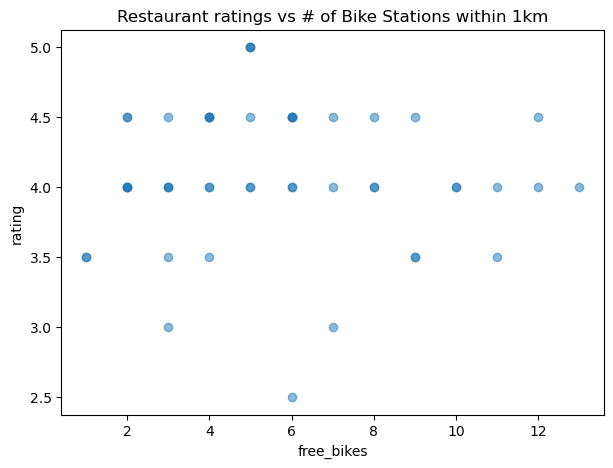

In [83]:
plt.figure(figsize=(7, 5))
plt.scatter(clean_citybikesdata['free_bikes'], cleaned_data_yelpfsq['rating'], marker='o', alpha=0.5)
plt.xlabel('free_bikes')
plt.ylabel('rating')
plt.title("Restaurant ratings vs # of Bike Stations within 1km")


plt.show()

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [84]:
import sqlite3

In [85]:
#create db file from data frame from above 
dbname = 'mergeddata.db'
connect = sqlite3.connect(dbname)
YelpFsqCitybikesDF.to_sql('mergeddata', connect, if_exists='replace', index=False)
connect.commit
connect.close

<function Connection.close()>

In [95]:
cursor = connect.cursor()
cursor.execute("SELECT * FROM mergeddata")



In [94]:
#check to see if dataframe still works 
data = cursor.fetchall()
dataframe = pd.DataFrame(data)

dataframe.head()

,0,1,2,3,4,5,6
0,Coop Wicked Chicken Hamilton,"{'address': '274 King St W', 'address_extended...",None,NaN,NaN,NaN,NaN
1,Coop Hamilton,"{'address': '274 King St W', 'address_extended...",None,NaN,NaN,NaN,NaN
2,Hess Village,"{'country': 'CA', 'formatted_address': 'Hamilt...",None,NaN,NaN,NaN,NaN
3,Ark + Anchor,"{'address': '300 King St W', 'country': 'CA', ...",None,NaN,NaN,NaN,NaN
4,La Luna Restaurant Downtown,"{'address': '306 King St W', 'country': 'CA', ...",None,NaN,NaN,NaN,NaN


Look at the data before and after the join to validate your data.

In [87]:
dfpart1.shape
dfpart1.head()

,name,location
0,Coop Wicked Chicken Hamilton,"{'address': '274 King St W', 'address_extended..."
1,Coop Hamilton,"{'address': '274 King St W', 'address_extended..."
2,Hess Village,"{'country': 'CA', 'formatted_address': 'Hamilt..."
3,Ark + Anchor,"{'address': '300 King St W', 'country': 'CA', ..."
4,La Luna Restaurant Downtown,"{'address': '306 King St W', 'country': 'CA', ..."


In [88]:
dfpart2.shape
dfpart2.head()


,name,location,rating
0,Famous Recipe,"{'address1': '158 King Street W', 'address2': ...",5.0
1,Bon Temps,"{'address1': '61 Young Street', 'address2': No...",5.0
2,Tomah,"{'address1': '132 Queen Street S', 'address2':...",5.0
3,Bronzie's Place,"{'address1': '201 James Street S', 'address2':...",4.5
4,Buona Vita Pizza,"{'address1': '82 Queen Street N', 'address2':...",4.5


In [89]:
yelpandfsq_mergedDF.shape
yelpandfsq_mergedDF.head()

,name,location_x,location_y,rating
0,Coop Wicked Chicken Hamilton,"{'address': '274 King St W', 'address_extended...",NaN,NaN
1,Coop Hamilton,"{'address': '274 King St W', 'address_extended...",NaN,NaN
2,Hess Village,"{'country': 'CA', 'formatted_address': 'Hamilt...",NaN,NaN
3,Ark + Anchor,"{'address': '300 King St W', 'country': 'CA', ...",NaN,NaN
4,La Luna Restaurant Downtown,"{'address': '306 King St W', 'country': 'CA', ...",NaN,NaN
